<a href="https://colab.research.google.com/github/iitdpooja/Deep-Learning-/blob/main/Linear_Regression_with_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

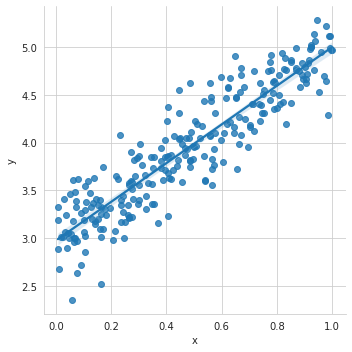

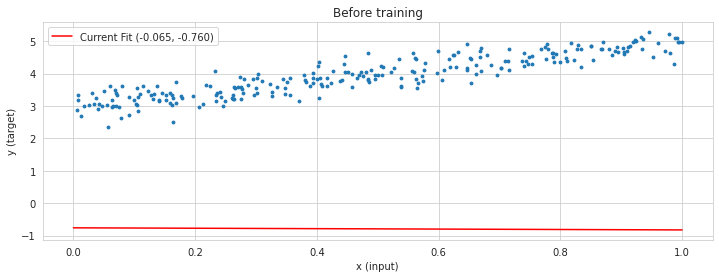

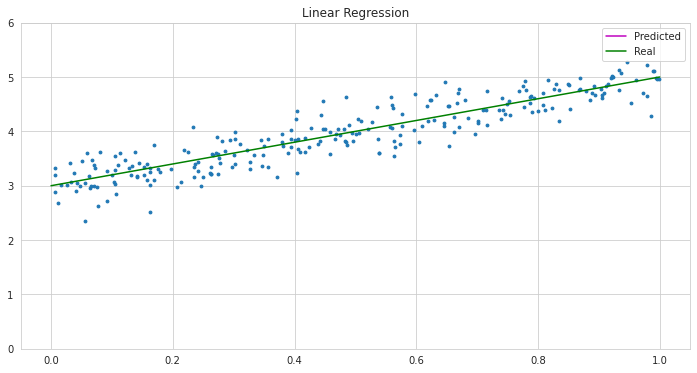

(tensor(-0.0648), tensor(-0.7603))

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
sns.set_style(style='whitegrid')
plt.rcParams["patch.force_edgecolor"] = True
m = 2 # slope
c = 3 # intercept
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = x * m + c + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y
sns.lmplot(x='x', y='y', data=df)
import torch
import torch.nn as nn
from torch.autograd import Variable

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
input_dim, output_dim   

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[w, b] = model.parameters()
def get_param_values():
    return w.data[0][0], b.data[0]
def plot_current_fit(title=""):
    plt.figure(figsize=(12,4))
    plt.title(title)
    plt.scatter(x, y, s=8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    x1= torch.from_numpy(x1)
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label='Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
plot_current_fit('Before training')



learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#The Variable API has been deprecated: Variables are no longer necessary to use autograd with tensors. Autograd automatically supports Tensors with requires_grad set to True. 
#Below please find a quick guide on what has changed:
#Variable(tensor) and Variable(tensor, requires_grad) still work as expected, but they return Tensors instead of Variables.

var.data is the same thing as tensor.data.
def run_epoch(epoch):
    # Convert from numpy array to torch tensors
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear the gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get the outputs
    outputs = model(inputs)
    
    # Calcuate loss
    loss = criterion(outputs, labels)
    
    # Getting gradients from parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
#     print('epoch {}, loss {}'.format(epoch, loss.data[0]))
    
    return loss




fig, (ax1) = plt.subplots(1, figsize=(12, 6))
ax1.scatter(x, y, s=8)

w1, b1 = get_param_values()
x1 = np.array([0., 1.])
x1= torch.from_numpy(x1)
y1 = x1 * w1 + b1
fit, = ax1.plot(x1, y1, 'm', label='Predicted'.format(w1, b1))
ax1.plot(x1, x1 * m + c, 'g', label='Real')
ax1.legend()
ax1.set_title('Linear Regression')

def init():
    ax1.set_ylim(0, 6)
    return fit,

def animate(i):
    loss = run_epoch(i)
    w1, b1 = get_param_values()
    y1 = x1 * w1 + b1
    fit.set_ydata(y1)

epochs = np.arange(1, 250)
ani = FuncAnimation(fig, animate, epochs, init_func=init, interval=100, blit=True, repeat=False)
plt.show()
get_param_values()
   